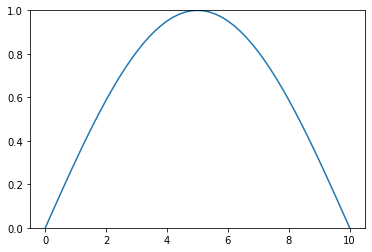

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# 参数设置
L = 10          # 空间长度
T = 2           # 总时间
Nx = 50         # 空间划分数量
Nt = 100        # 时间划分数量
alpha = 0.01    # 热扩散率
dx = L / Nx     # 空间步长
dt = T / Nt     # 时间步长

# 初始化温度分布
x = np.linspace(0, L, Nx+1)
T_init = np.sin(np.pi * x / L)  # 初始条件：正弦分布

# 创建温度矩阵
T_matrix = np.zeros((Nx+1, Nt+1))
T_matrix[:, 0] = T_init

# 数值解算
for n in range(0, Nt):
    for i in range(1, Nx):
        T_matrix[i, n+1] = T_matrix[i, n] + alpha * dt / dx**2 * (T_matrix[i+1, n] - 2*T_matrix[i, n] + T_matrix[i-1, n])
    # 应用边界条件
    T_matrix[0, n+1] = 0  # 左边界
    T_matrix[Nx, n+1] = 0  # 右边界

# 可视化设置
fig, ax = plt.subplots()
line, = ax.plot(x, T_matrix[:, 0])
ax.set_ylim(0, 1)

def update(n):
    line.set_ydata(T_matrix[:, n])
    return line,

# 创建动画
ani = animation.FuncAnimation(fig, update, frames=Nt, interval=50)

plt.show()
